In [1]:
import os
os.environ["SPS_HOME"] = "/d/ret1/Taylor/fsps/" 
import fsps
import matplotlib.pyplot as plt
import numpy as np


# Define ages in Gyr and their mass weights
ages = [0.01, 0.1]  # Gyr
weights = [0.9, 0.1]  # fraction of total mass in each population

# Initialize FSPS
sp = fsps.StellarPopulation()
wave, _ = sp.get_spectrum(tage=ages[0], peraa=True)  # get wavelength array
composite_spec = np.zeros_like(wave)

# Build weighted sum of spectra
for age, weight in zip(ages, weights):
    _, spec = sp.get_spectrum(tage=age, peraa=True)
    composite_spec += weight * spec  # Lsun/Å

c = 2.99792458e18  # speed of light in Å/s
Lsun = 3.828e33    # solar luminosity in erg/s

freq = c / wave  # ν = c / λ, freq in Hz

L_lambda = composite_spec * Lsun  # erg/s/Å
L_nu = L_lambda * (wave**2) / c  # erg/s/Hz

comp_nuFnu = freq * L_nu  # erg/s
ryd_per_hz = 3.039e-16
energy_ryd = freq * ryd_per_hz
log_energy = np.log10(energy_ryd)
log_comp_nuFnu = np.log10(comp_nuFnu)


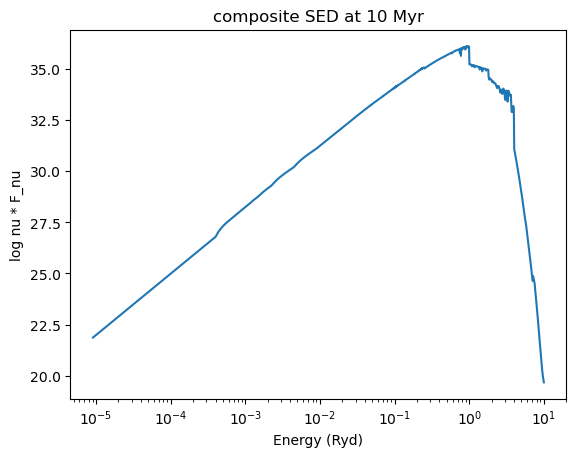

In [2]:
plt.plot(energy_ryd, log_comp_nuFnu)
plt.xlabel("Energy (Ryd)")
plt.ylabel("log nu * F_nu")
plt.title("composite SED at 10 Myr")
plt.xscale("log")
plt.show()

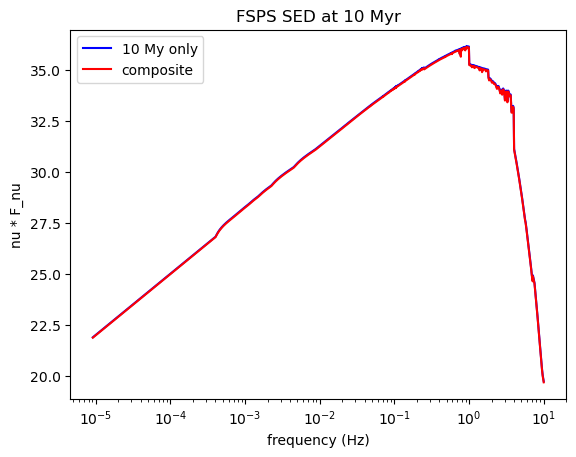

In [3]:
sp = fsps.StellarPopulation()
wave, spec = sp.get_spectrum(tage=0.01, peraa=True)  # get wavelength array

c = 2.99792458e18  # speed of light in Å/s
Lsun = 3.828e33    # solar luminosity in erg/s

freq = c / wave  # ν = c / λ, freq in Hz

L_lambda = spec * Lsun  # erg/s/Å
L_nu = L_lambda * (wave**2) / c  # erg/s/Hz

nuFnu = freq * L_nu  # erg/s
ryd_per_hz = 3.039e-16
energy_ryd = freq * ryd_per_hz
log_energy = np.log10(energy_ryd)
log_nuFnu = np.log10(nuFnu)
plt.plot(energy_ryd, log_nuFnu, color = 'blue', label ='10 My only')
plt.plot(energy_ryd, log_comp_nuFnu, color = 'red', label = 'composite')
plt.xlabel("frequency (Hz)")
plt.ylabel("nu * F_nu")
plt.title("FSPS SED at 10 Myr")
plt.xscale("log")
plt.legend()
plt.show()



In [4]:
comp_data = np.column_stack([energy_ryd, log_comp_nuFnu])
isochronic_data = np.column_stack([energy_ryd, log_nuFnu])

np.savetxt("fsps_young.ascii", comp_data, fmt="%.6e", header="energy_in_rydbergs log_nuFnu_ergs")

print('data written to files above')

data written to files above
